## PREDICTING STUDENT'S ACADEMIC SUCCESS AND DROPOUT. 
### *A MACHINE LEARNING PROJECT*

## I - PROBLEM

**Boston's "El Puente" University** wants to improve its student selection process to help it reach one of the **top three spots** in the national rankings. They would like to hire you to assist them in achieving this goal. 

To accomplish this objective, you will need to gather and analyze various types of data. By identifying patterns and correlations in the data, a predictive model will be developed, so it can help the university assess the **likelihood of a candidate's success at El Puente.**

The project will help El Puente **improve its student selection process** and attract the best and brightest candidates. By identifying the key traits and characteristics of successful students, the university can increase its ranking and reputation, as well as provide a better educational experience for its students.

## II - DATASET

1) cargar librerias y dataset. La fuente del dataset es la pagina web Kaggle


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/data_big.csv', sep=';')
df = data
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [62]:
#vemos que no tenemos NaNs y que la variable tarjet es un object

In [4]:
data.describe()
#datos no escalados y presencia de algunos outliers en columnas como nacionalidad, previous qualification...

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
data.Target.value_counts() #target balanceado. no necesario samplear 

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [6]:
#target_int #hay que hacer un MAPEO

my_dict = {"Dropout":0, 
           "Enrolled":1, 
           "Graduate":2, 
}

df['Target_maped'] = df['Target'].map(my_dict)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_maped
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2


<AxesSubplot:xlabel='Target_maped', ylabel='Density'>

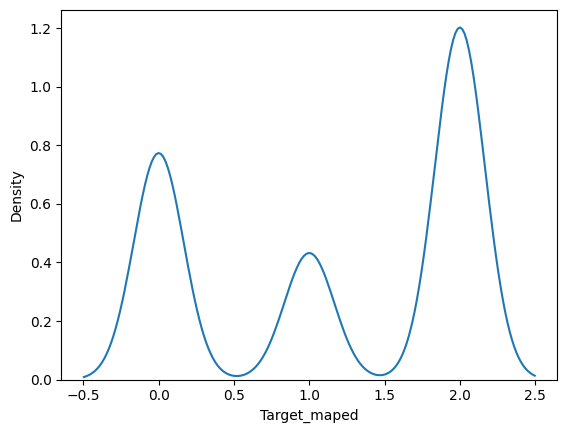

In [7]:
sns.kdeplot(df.Target_maped)

In [8]:
import numpy as np
#Convertir nacionalidad en solo dos grupos: EEUU y extranjeros
df['Nacionality'] = np.where(df['Nacionality'] == 1, 1, 2)


2) EDA

c:\Users\rivas\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\rivas\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py:658: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]


<AxesSubplot:>

C:\Users\rivas\AppData\Roaming\Python\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\rivas\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


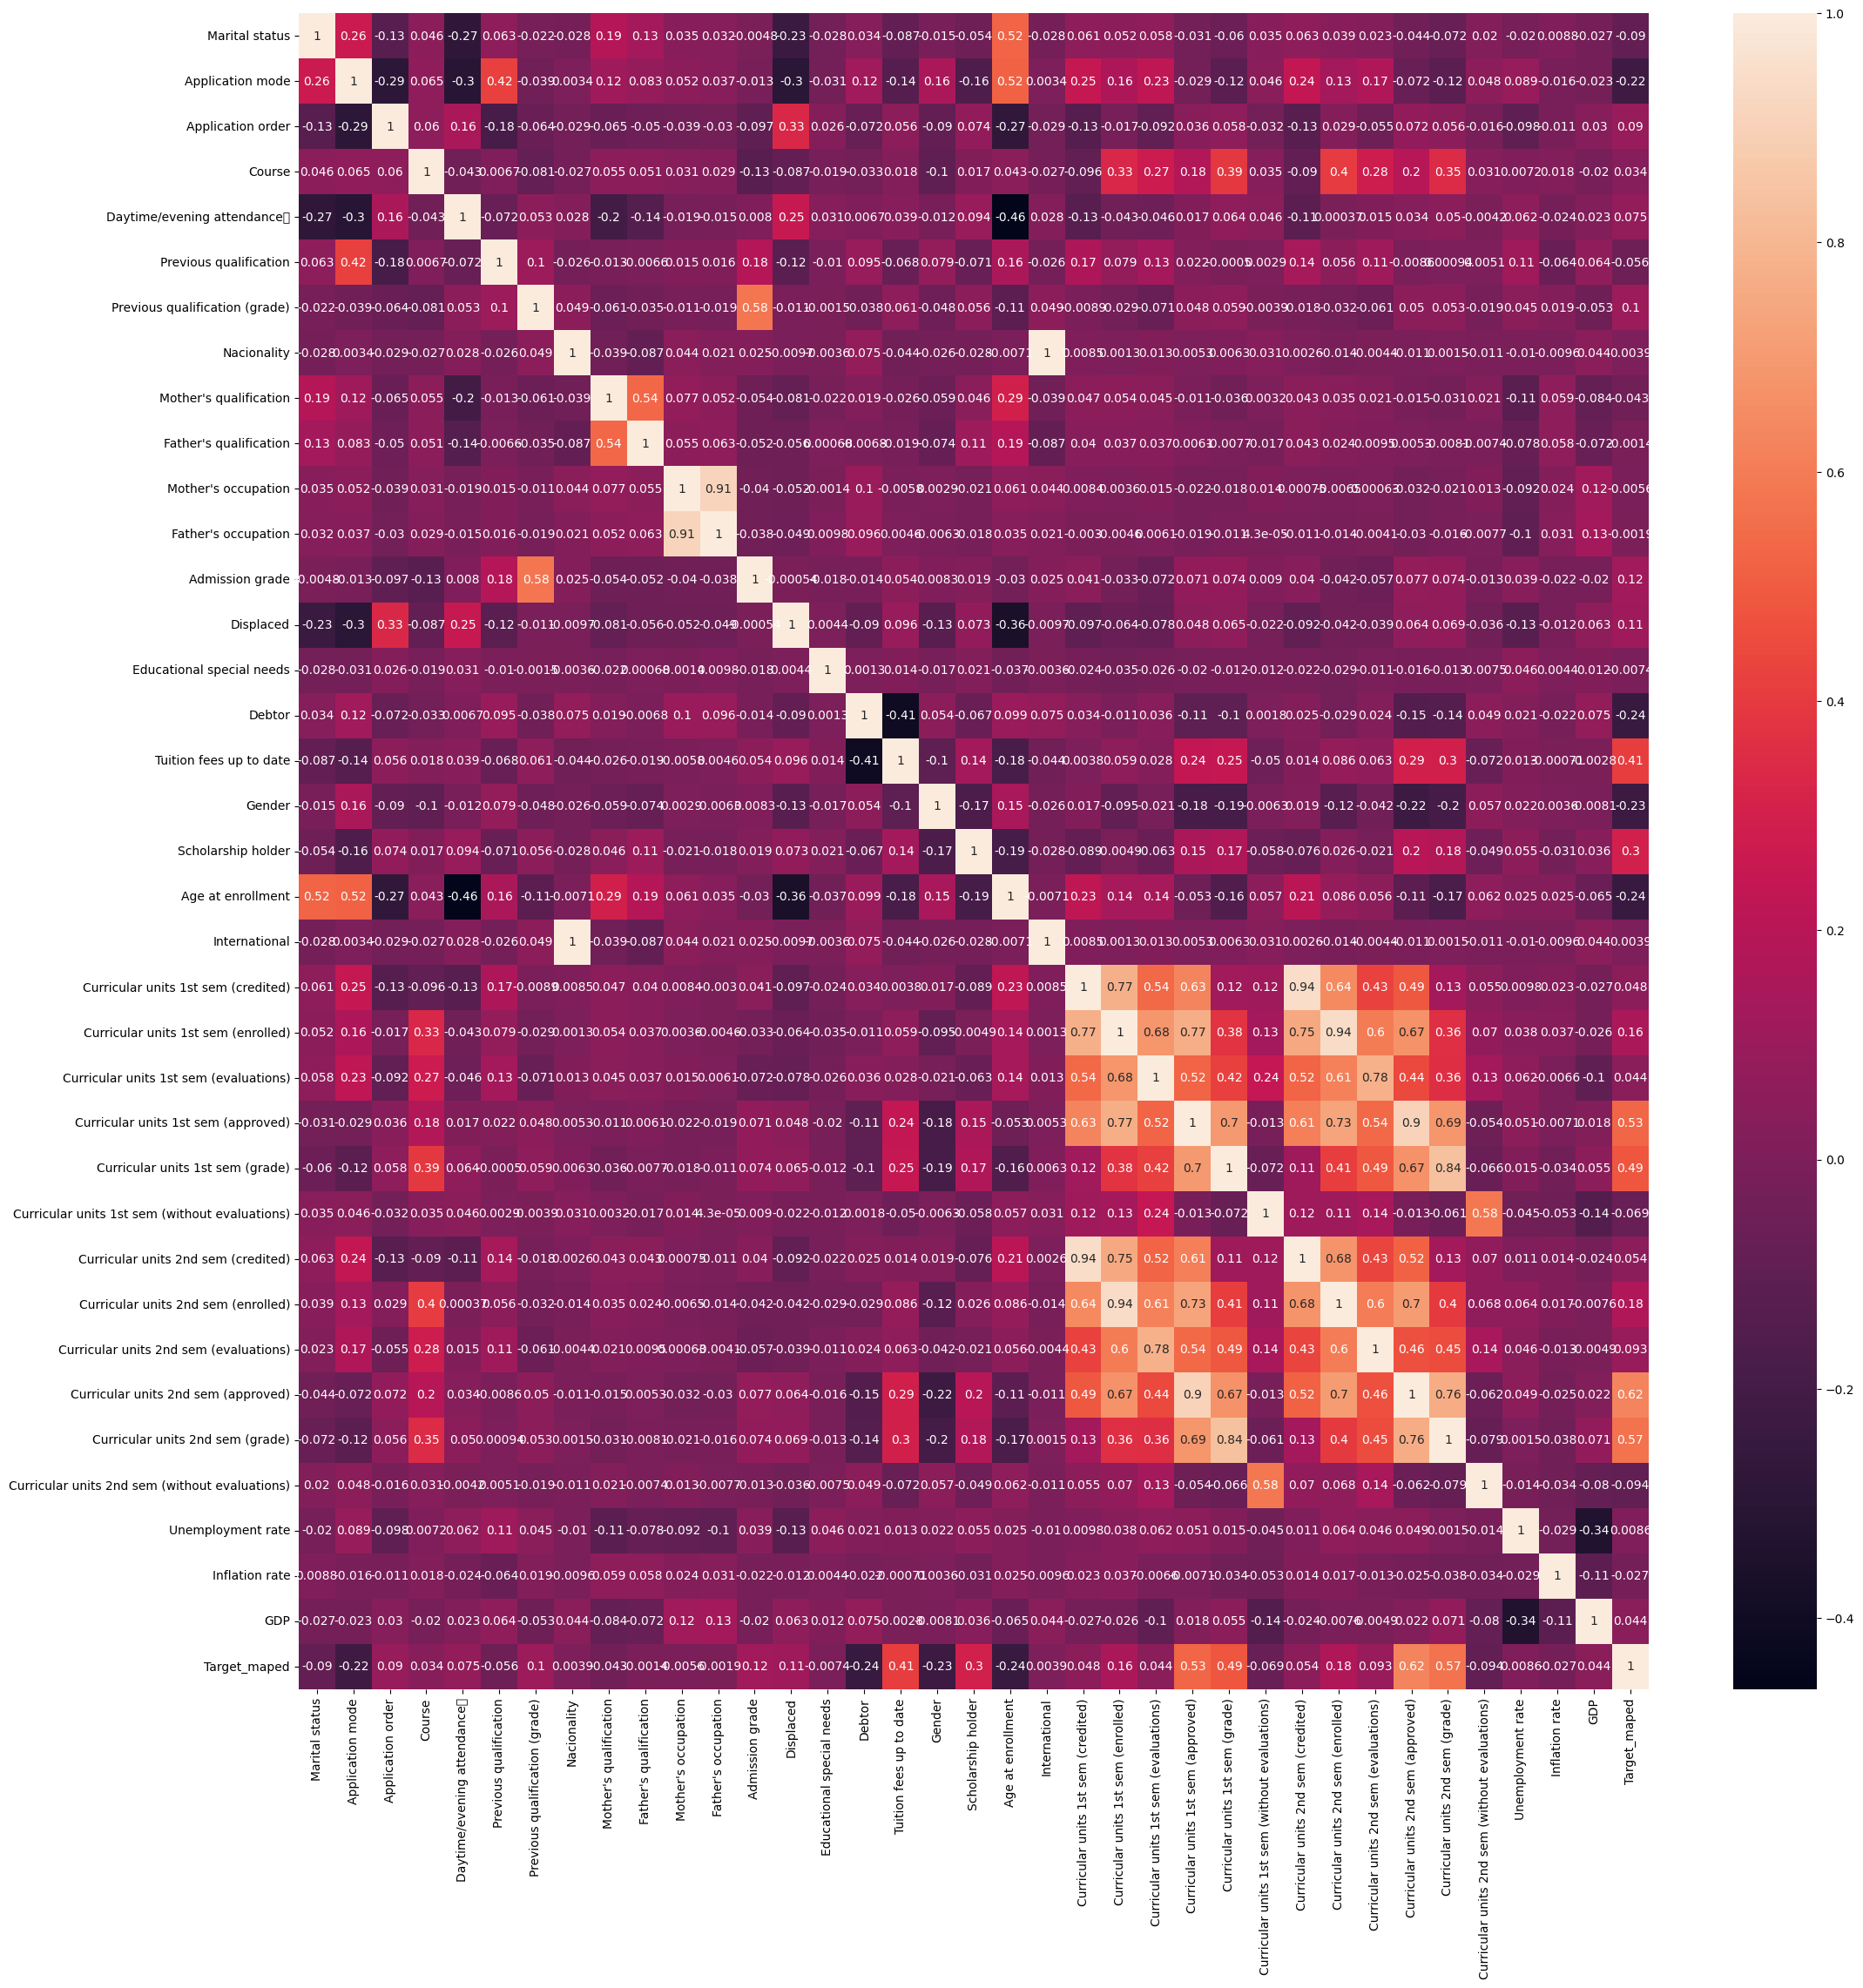

In [9]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True)

Tenemos un problema **clasificacion**, donde la variable target es **multiclase**. Podemos abordar este problema de muchas maneras, una de ellas es **reduciendo las dimensiones** de mi dataset aplicando un modelo de aprendizaje no supervisado **PCA**, para el preprocesado de los datos antes de entrenar un modelo. 

VISUALIZACIÓN DE VARIABLES 


In [71]:
df.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [72]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

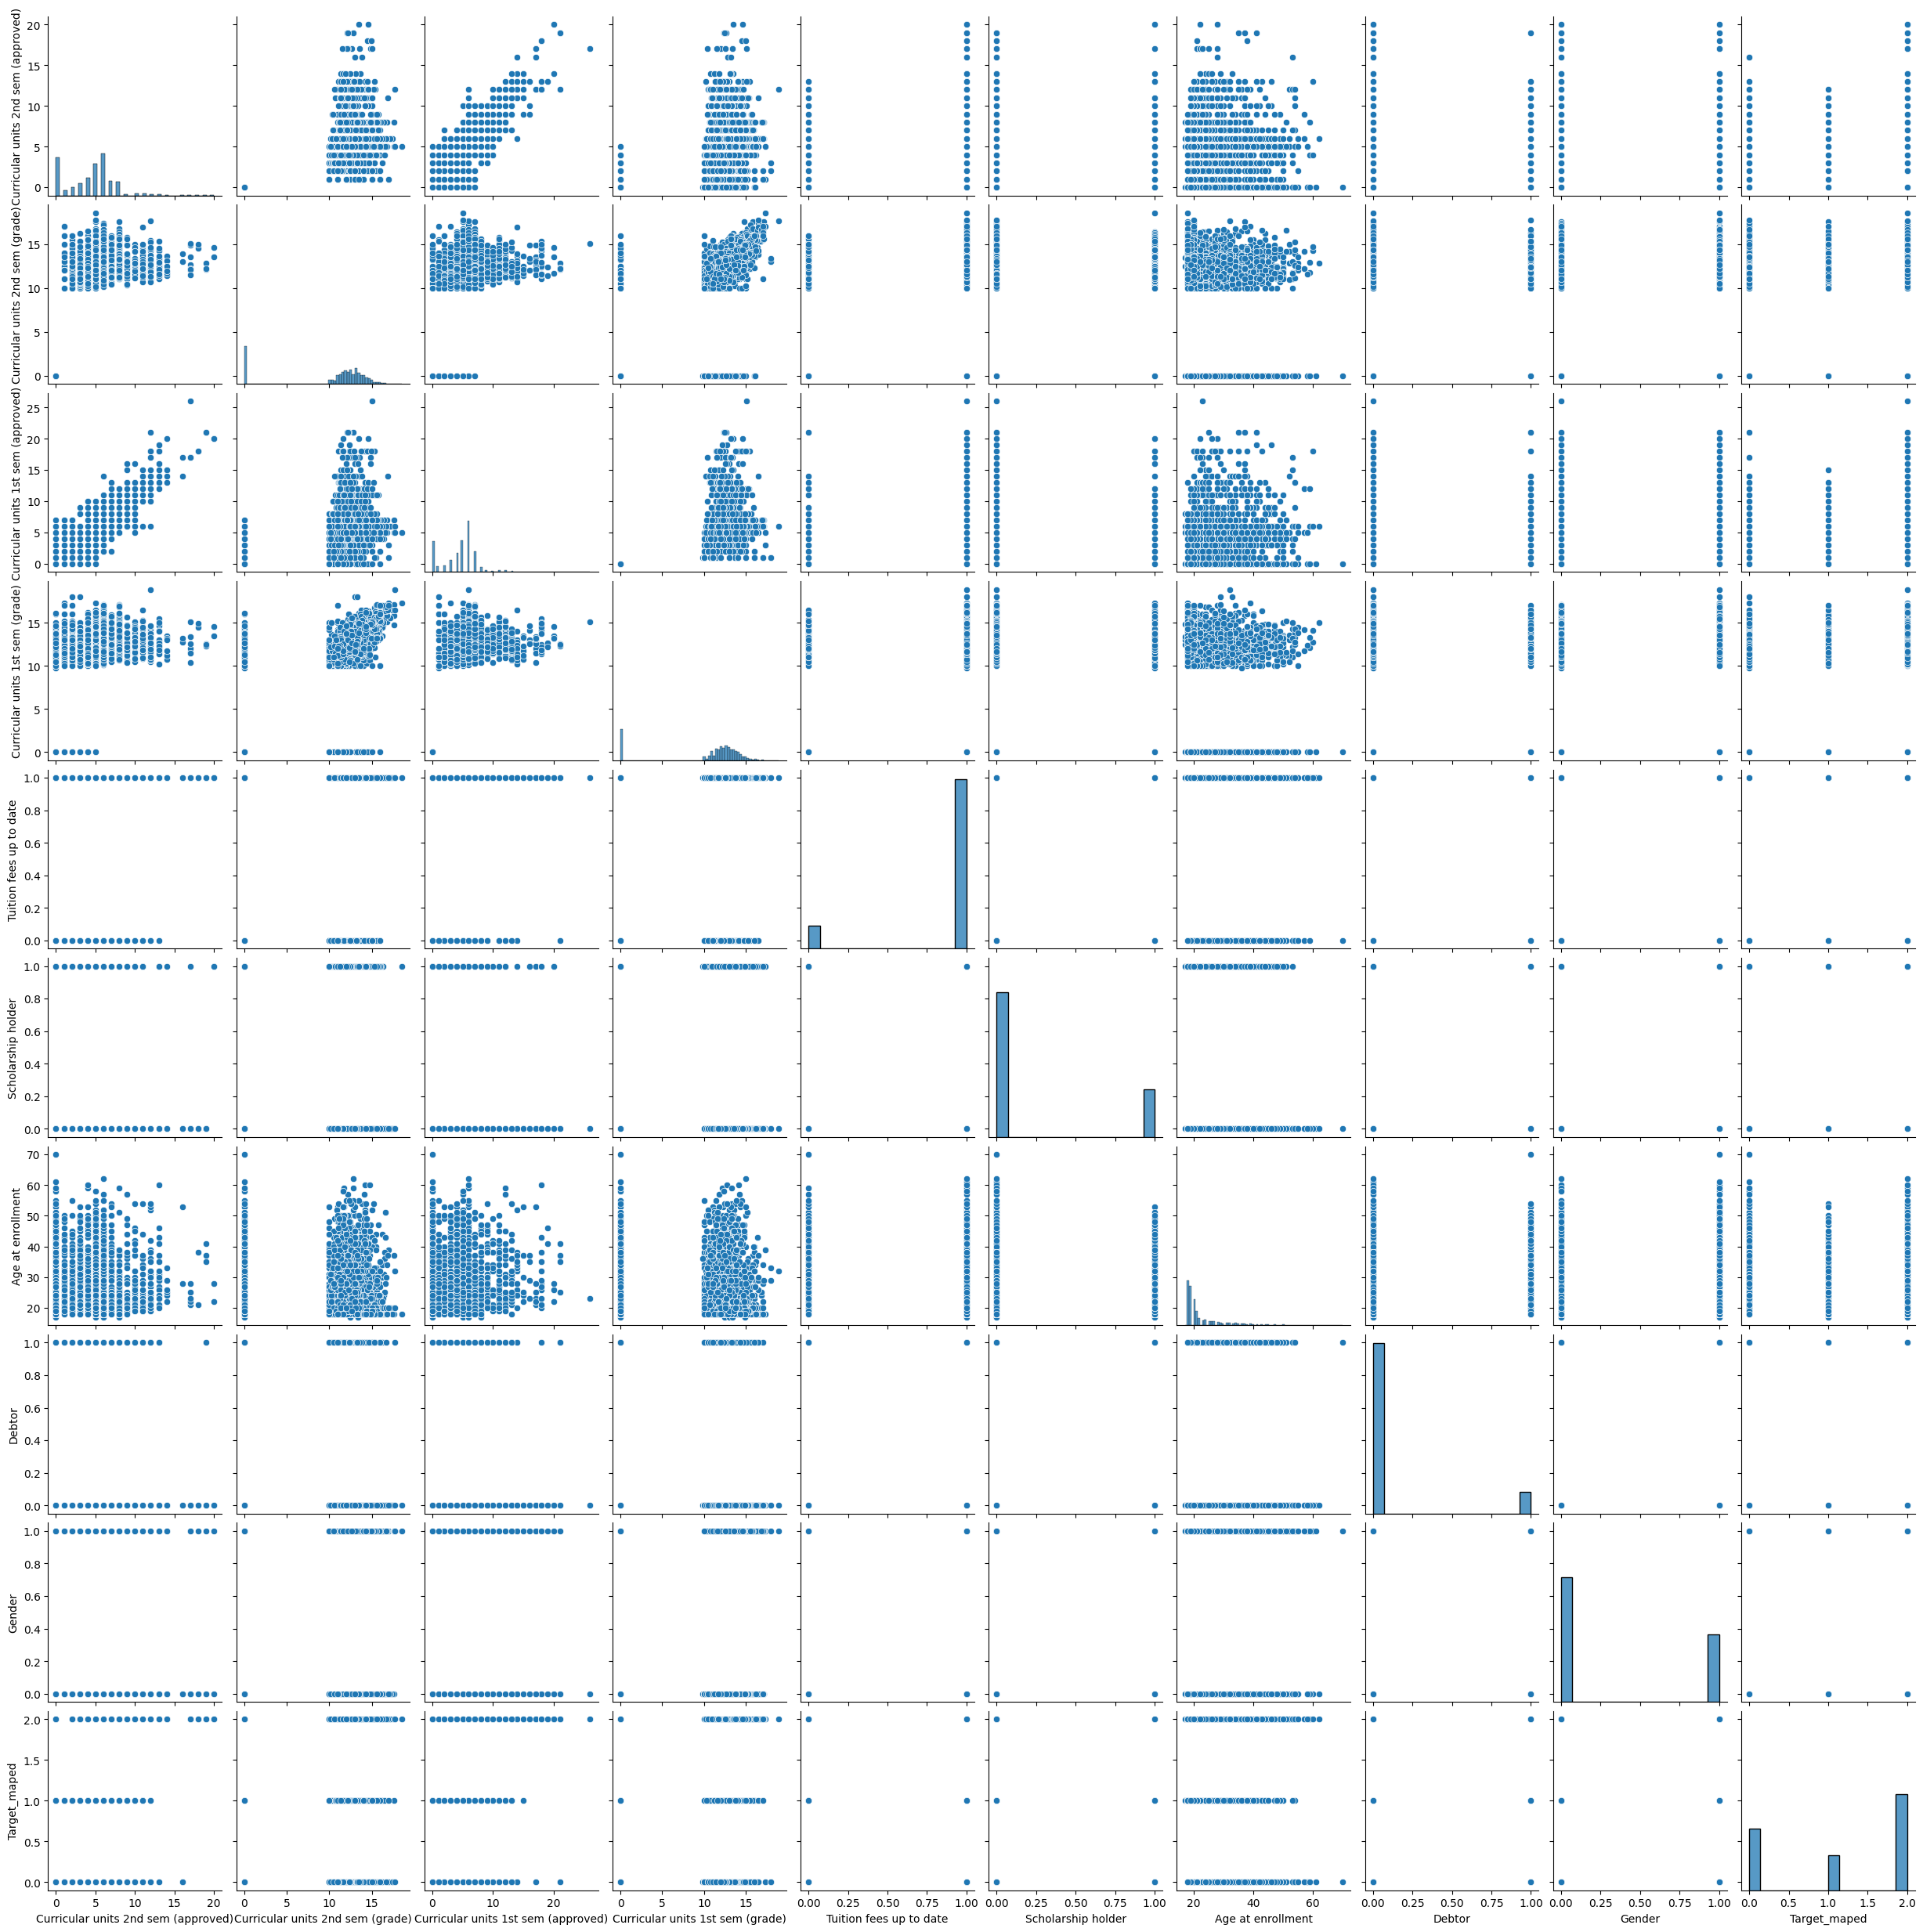

In [68]:
sns.pairplot(df)

<AxesSubplot:xlabel='Curricular units 2nd sem (grade)', ylabel='Density'>

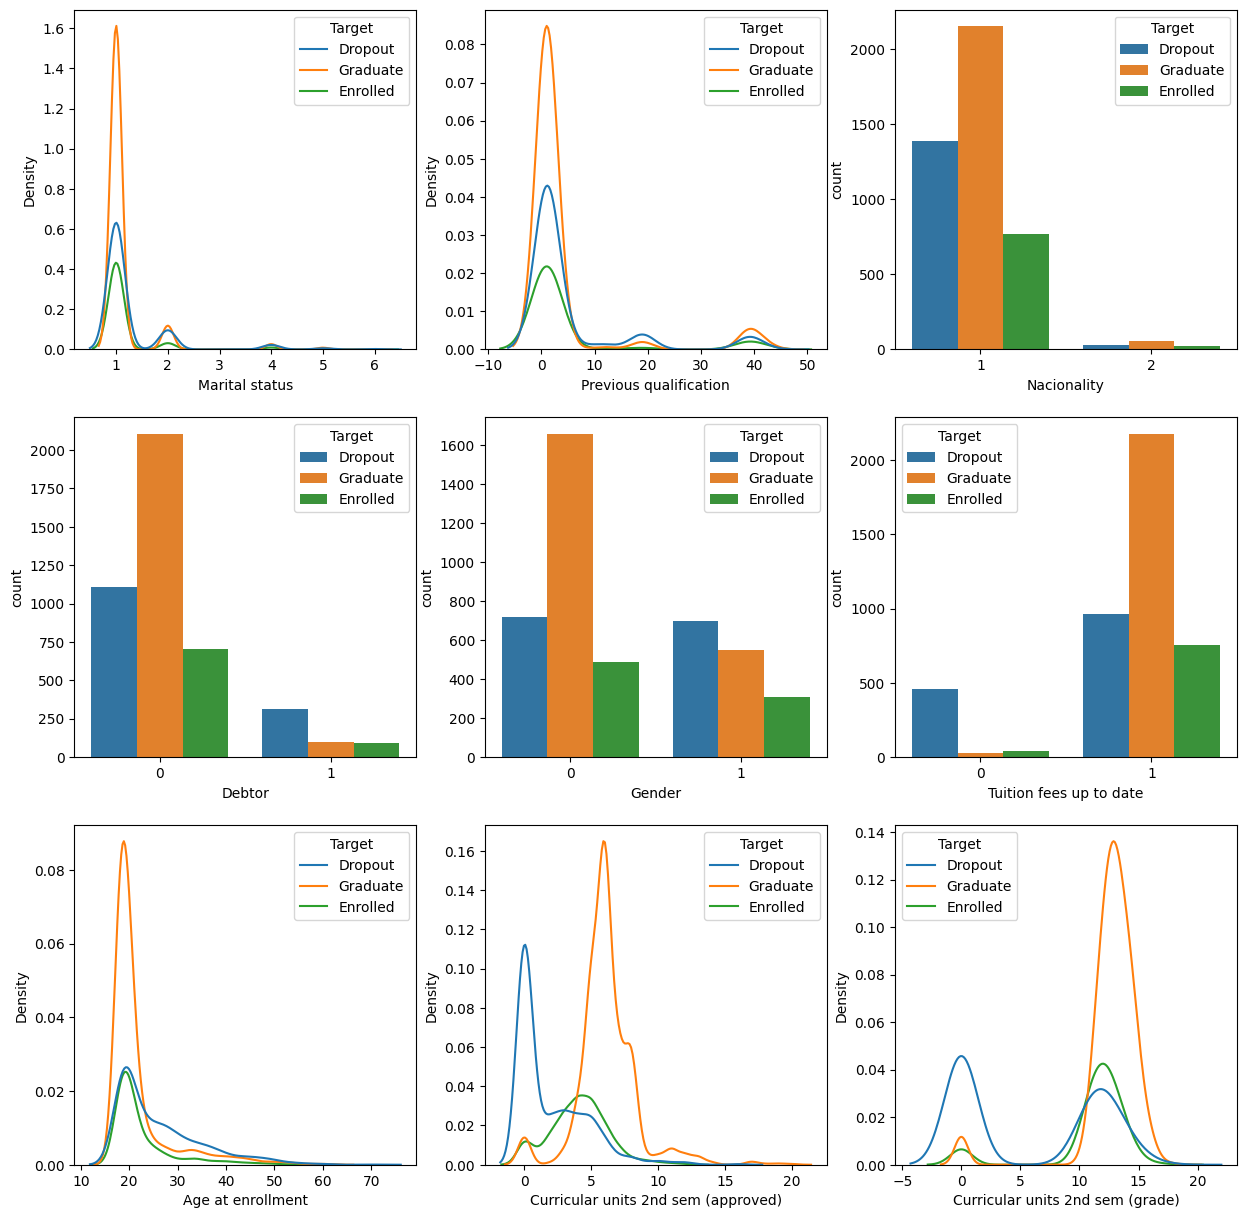

In [73]:
# Crear una figura de 3 filas y 2 columnas
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Primer gráfico: 
sns.kdeplot(df, x = df['Marital status'], hue=df['Target'], ax=axs[0,0])

# Segundo gráfico:
sns.kdeplot(data = df, x = df['Previous qualification'], hue=df['Target'], ax=axs[0, 1])

# Tercer gráfico: 
sns.countplot(data = df, x = df['Nacionality'], hue=df['Target'], ax=axs[0, 2])

# Cuarto gráfico: 
sns.countplot(data = df, x = df['Debtor'], hue=df['Target'], ax=axs[1,0])

# Quinto gráfico:
sns.countplot(data = df, x = df['Gender'], hue=df['Target'], ax=axs[1, 1])

sns.countplot(data = df, x = df['Tuition fees up to date'], hue=df['Target'], ax=axs[1, 2])
sns.kdeplot(data = df, x = df['Age at enrollment'], hue=df['Target'], ax=axs[2, 0])
sns.kdeplot(data = df, x = df['Curricular units 2nd sem (approved)'], hue=df['Target'], ax=axs[2, 1])
sns.kdeplot(data = df, x = df['Curricular units 2nd sem (grade)'], hue=df['Target'], ax=axs[2, 2])

## III - DATA PREPROCESSING

Tras estos análisis podemos comprobar que hay factores como la edad y el genero que son muy relevantes a la hora de entender el exito de los alumnos. También las relacionadas con las deudas y los plazos de pago. Sin embargo vemos que otras como la nacionalidad no aportan virtualmente ningún peso a la hora de la prediccion

In [69]:
df.Gender.value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

ELIMINACIÓN DE FEATURES

Arriba vemos que la nacionalidad no es un factor influyente, la podemos eliminar

In [74]:
df.corr()['Target_maped'].abs().sort_values(ascending=False).head(10)

Target_maped                           1.000000
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Tuition fees up to date                0.409827
Scholarship holder                     0.297595
Age at enrollment                      0.243438
Debtor                                 0.240999
Gender                                 0.229270
Name: Target_maped, dtype: float64

In [15]:
# Vamos a quitar variables sin correlacion con target
df = df[['Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date','Scholarship holder', 'Age at enrollment', 'Debtor','Gender', 'Target', 'Target_maped']]



## IV - MODELING

### PRIMERA PRUEBA

X e y. division en Train-test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=33)

Comprobamos shapes

In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3539, 10)
(3539,)
(885, 10)
(885,)


Escalado (a train para no contaminar los datos de test)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled.shape

(3539, 10)

APLICACION DE PCA PARA REDUCIR FEATURES

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [23]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

Veamos cómo de buenos predictores son las nuevas dimensiones

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.41470799, 0.55211348, 0.66266059, 0.7468304 , 0.82926492,
       0.88691759, 0.93558029, 0.97560344, 0.99329757, 1.        ])

In [25]:
pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,11))

1     0.414708
2     0.552113
3     0.662661
4     0.746830
5     0.829265
6     0.886918
7     0.935580
8     0.975603
9     0.993298
10    1.000000
dtype: float64

Text(0, 0.5, 'cumulative explained ratio')

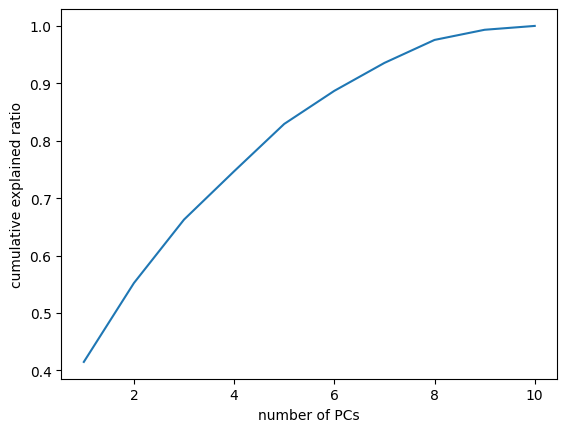

In [26]:

plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,11)))
plt.xlabel('number of PCs')
plt.ylabel("cumulative explained ratio")

vamos a quedarnos con 7 PCs

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [28]:
pipe = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('pca', PCA(n_components=7)),
                    ('classifier', RandomForestClassifier(max_depth=5))
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [89]:
# predicciones

In [29]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9367231638418079


<AxesSubplot:>

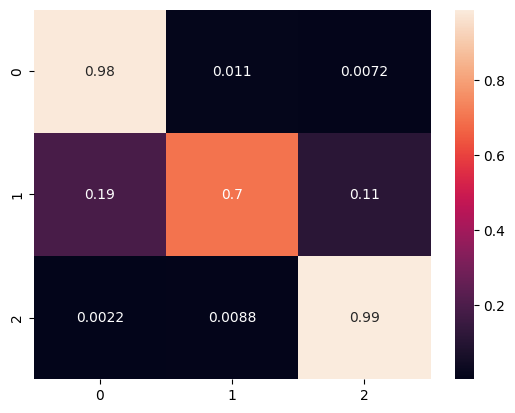

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred, normalize= 'true'), annot=True)

Vamos a intentar mejorar el modelo aplicando un GS

In [33]:
pipe_gs = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('pca', PCA()),
                    ('classifier', RandomForestClassifier())
])
pipe_gs

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('classifier', RandomForestClassifier())])

In [34]:
from sklearn.model_selection import GridSearchCV

Inicialmente salió 2 como min de leaf, pero tambien era el mas bajo disponible. Probamos con 1 para ver si podemos mejorar el modelo

In [35]:
params = {
        'pca__n_components': np.arange(1,10),
        'classifier__max_depth': np.arange(1,7),
        'classifier__min_samples_leaf': [1,2,4,6]
}

gs = GridSearchCV(pipe_gs, params, cv=10, scoring='accuracy')

In [36]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': array([1, 2, 3, 4, 5, 6]),
                         'classifier__min_samples_leaf': [1, 2, 4, 6],
                         'pca__n_components': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [37]:
gs.best_params_

{'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 2,
 'pca__n_components': 9}

In [38]:
pipe_final = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('pca', PCA(n_components=9)),
                    ('classifier', RandomForestClassifier(max_depth=6, min_samples_leaf=2))
])
pipe_final

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('classifier',
                 RandomForestClassifier(max_depth=6, min_samples_leaf=2))])

In [39]:
pipe_final.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('classifier',
                 RandomForestClassifier(max_depth=6, min_samples_leaf=2))])

## V - PREDICTIONS AND FINAL RESULTS

In [40]:
y_pred_best = pipe_final.predict(X_test)

### PRUEBA CON GS METODO DOS (no sale bien)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#PRUEBA CON MAS MODELOS UFF KUIDAO
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ('classifier', RandomForestClassifier())
])

logistic_params = {
    'selectkbest__k': np.arange(5,21,5),
    'classifier': [LogisticRegression(max_iter=1000, solver='liblinear')],
    'classifier__penalty': ['l1', 'l2']
}

random_forest_params = {
    'selectkbest__k': np.arange(5,21,5),
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1,3,5],
    'classifier__max_depth': [1,3,5]
}

svm_param = {
    'selectkbest__k': np.arange(5,21,5),
    'classifier': [SVC()],
    'classifier__C': [0.1, 0.5, 1, 10, 100],
}

knn_param = {
    'selectkbest__k': np.arange(5,21,5),
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [3,9,15],
}


gb_param = {
    'selectkbest__k': np.arange(5,21,5),
    'classifier': [GradientBoostingClassifier()],
    'classifier__max_depth': [1,3,5],
}
search_space = [
    logistic_params,
    random_forest_params,
    svm_param,
    knn_param,
    gb_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 5,
                  scoring="accuracy")


In [ ]:
clf.fit(X_train, y_train)

c:\Users\rivas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
220 fits failed out of a total of 440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rivas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rivas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\rivas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklea

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000,
                                                            penalty='l1',
                                                            solver='liblinear')],
                          'classifier__penalty': ['l1', 'l2'],
                          'selectkbest__k': array([ 5, 10, 15, 20])},
                         {'classifier': [RandomForestClassifier()]...
                          'selectkbest__k': array([ 5, 10, 15, 20])},
                         {'classifier': [SVC()],
                          'classifier__C': [0.1, 0.5, 1, 10, 100],
                          'selectkbest__k': array([ 5, 10, 15, 20])},
                         {'c

In [ ]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=5)),
                ('classifier',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [ ]:
clf.best_params_

{'classifier': LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear'),
 'classifier__penalty': 'l1',
 'selectkbest__k': 5}

In [ ]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=5)),
                ('classifier',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [ ]:
y_pred_clf = clf.best_estimator_.predict(X_test)

In [ ]:
print('Accuracy', accuracy_score(y_test, y_pred_clf))

Accuracy 0.7231638418079096


## METRICAS

In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                           roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [63]:
print('Accuracy', accuracy_score(y_test, y_pred_best))

Accuracy 0.984180790960452


In [67]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Evaluar el modelo utilizando validación cruzada
train_scores = cross_val_score(pipe_final, X_train, y_train, cv=5)
test_scores = cross_val_score(pipe_final, X_test, y_test, cv=5)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
print("Train accuracy: %0.2f (+/- %0.2f)" % (train_scores.mean(), train_scores.std() * 2))
print("Test accuracy: %0.2f (+/- %0.2f)" % (test_scores.mean(), test_scores.std() * 2))

# Si la precisión del modelo en el conjunto de entrenamiento es significativamente mayor que en el conjunto de prueba, es probable que haya overfitting

Train accuracy: 0.98 (+/- 0.01)
Test accuracy: 0.97 (+/- 0.03)


arañamos unas decimas reducion el sample_leaf del regressiontree

In [70]:
import pickle

with open('my_model_best2', 'wb') as archivo_salida:
    pickle.dump(pipe_final, archivo_salida)

In [ ]:
y_test.to_csv('y_test.csv')